original image:


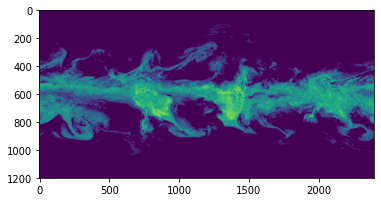

ds.RasterCount=1
band 1
   FID                                           geometry
0    0  POLYGON ((11.62500 74.77500, 17.77500 74.77500...
1    1  POLYGON ((18.82500 72.67500, 19.42500 72.67500...
2    2  POLYGON ((2.62500 72.37500, 3.37500 72.37500, ...
3    3  POLYGON ((2.17500 72.07500, 2.32500 72.07500, ...
4    4  POLYGON ((20.47500 71.92500, 20.62500 71.92500...


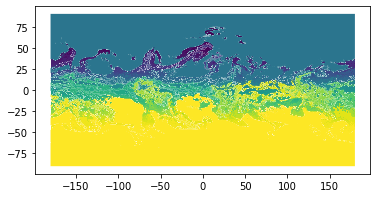

In [64]:
# see https://gdal.org/python/osgeo.utils.gdal_polygonize-pysrc.html
# pip install descartes
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
from osgeo import gdal, ogr
import ogr
import numpy as np

# this allows GDAL to throw Python Exceptions
gdal.UseExceptions()

filename = 'out'

# open dataset
# TODO: If I put three colours in a file (red, green and white background) - I get three bands.
# TODO: If I add a transparancy, I get 4 bands, but band 0 I can't use.
ds = gdal.Open('{}.tiff'.format(filename))

print('original image:')
img = Image.open('{}.tiff'.format(filename))
img_array = np.asarray(img)
plt.imshow(img_array)
plt.show()


print('ds.RasterCount={}'.format(ds.RasterCount))
# for index in range(1, ds.RasterCount+1):
index = 1
print('band {}'.format(index))

band = ds.GetRasterBand(index)

## Save to shapefile
driver = ogr.GetDriverByName('ESRI Shapefile')
shapefilename = '{}_{}.shp'.format(filename, index)
dst_ds = driver.CreateDataSource(shapefilename)
dst_layer = dst_ds.CreateLayer('polygons', srs=None)

gdal.Polygonize(band, None, dst_layer, -1, [], callback=None)

dst_ds = None

## Plot shapefile
shapefile = gpd.read_file(shapefilename)
print(shapefile.head())
shapefile.plot(column='FID')


## Save to GeoJSON
driver = ogr.GetDriverByName('GeoJSON')
jsonfilename = '{}_{}.geojson'.format(filename, index)
dst_ds = driver.CreateDataSource(jsonfilename)
dst_layer = dst_ds.CreateLayer('polygons', srs=None)

gdal.Polygonize(band, None, dst_layer, -1, [], callback=None)

# close dataset
ds = None
dst_ds = None

In [7]:
# Get list of available drivers

import gdal

for i in range(gdal.GetDriverCount()):
    driver = gdal.GetDriver(i)
    print(driver.GetDescription())

VRT
DERIVED
GTiff
NITF
RPFTOC
ECRGTOC
HFA
SAR_CEOS
CEOS
JAXAPALSAR
GFF
ELAS
AIG
AAIGrid
GRASSASCIIGrid
SDTS
DTED
PNG
JPEG
MEM
JDEM
GIF
BIGGIF
ESAT
FITS
BSB
XPM
BMP
DIMAP
AirSAR
RS2
SAFE
PCIDSK
PCRaster
ILWIS
SGI
SRTMHGT
Leveller
Terragen
GMT
netCDF
HDF4
HDF4Image
ISIS3
ISIS2
PDS
PDS4
VICAR
TIL
ERS
JP2OpenJPEG
L1B
FIT
GRIB
RMF
WCS
WMS
MSGN
RST
INGR
GSAG
GSBG
GS7BG
COSAR
TSX
COASP
R
MAP
KMLSUPEROVERLAY
WEBP
PDF
Rasterlite
MBTiles
PLMOSAIC
CALS
WMTS
SENTINEL2
MRF
PNM
DOQ1
DOQ2
PAux
MFF
MFF2
FujiBAS
GSC
FAST
BT
LAN
CPG
IDA
NDF
EIR
DIPEx
LCP
GTX
LOSLAS
NTv1
NTv2
CTable2
ACE2
SNODAS
KRO
ROI_PAC
RRASTER
BYN
ARG
RIK
USGSDEM
GXF
DODS
BAG
HDF5
HDF5Image
NWT_GRD
NWT_GRC
ADRG
SRP
BLX
EPSILON
PostGISRaster
SAGA
IGNFHeightASCIIGrid
XYZ
HF2
JPEGLS
OZI
CTG
E00GRID
ZMap
NGSGEOID
IRIS
PRF
RDA
EEDAI
EEDA
DAAS
SIGDEM
GNMFile
GNMDatabase
ESRI Shapefile
MapInfo File
UK .NTF
OGR_SDTS
S57
DGN
OGR_VRT
REC
Memory
BNA
CSV
NAS
GML
GPX
LIBKML
KML
GeoJSON
GeoJSONSeq
ESRIJSON
TopoJSON
Interlis 1
Interlis 2
OGR_GMT
G

In [1]:
# Create a geotiff file
# https://gis.stackexchange.com/questions/164853/reading-modifying-and-writing-a-geotiff-with-gdal-in-python

# Playing around with generating a tiff file.
# If you want a mono color, just do one band.
# For RGB - you need three bands. (R-1, G-2, B-3)


import gdal
import numpy as np

driver = gdal.GetDriverByName("GTiff")

# create color table
# colors = gdal.ColorTable()

# set color for each value
# colors.SetColorEntry(0, (255, 255, 255))
# colors.SetColorEntry(1, (112, 153, 89))
# colors.SetColorEntry(2, (242, 238, 162))
# colors.SetColorEntry(3, (242, 206, 133))
# colors.SetColorEntry(4, (194, 140, 124))
# colors.SetColorEntry(5, (214, 193, 156))

nodata = 0

max_rgb = 255
rows = 1000
cols = 1000
r_arr_out = []
g_arr_out = []
b_arr_out = []
for x in range(rows):
#     if x > 0 and x < 100:
#         color = 0
#     elif x < 200:
#         color = 1
#     elif x < 300:
#         color = 2
#     elif x < 400:
#         color = 3
#     elif x < 500:
#         color = 4
#     elif x < 600:
#         color = 5
    r_row = []
    g_row = []
    b_row = []
    for y in range(cols):
#         row.append(x)
        r_row.append(x / 1000 * max_rgb)
        g_row.append(y / 1000 * max_rgb)
        b_row.append((x*y) / 1000 % 1000 * max_rgb)
    r_arr_out.append(r_row)
    g_arr_out.append(g_row)
    b_arr_out.append(b_row)

outdata = driver.Create('out.tiff', rows, cols, 3, gdal.GDT_Byte)
# outdata = driver.Create('out.tiff', rows, cols, 1, gdal.GDT_UInt16)

# band = outdata.GetRasterBand(1)
# set color table and color interpretation
# band.SetRasterColorTable(colors)
# band.SetRasterColorInterpretation(gdal.GCI_PaletteIndex)
outdata.GetRasterBand(1).WriteArray(np.array(r_arr_out))
outdata.GetRasterBand(2).WriteArray(np.array(g_arr_out))
outdata.GetRasterBand(3).WriteArray(np.array(b_arr_out))
# band.SetNoDataValue(nodata)
outdata.FlushCache()

del outdata


In [60]:
import struct
import gdal

def read_scanline(band, yoff):
    scanline = band.ReadRaster(xoff=0, yoff=yoff,
                               xsize=band.XSize, ysize=1,
                               buf_xsize=band.XSize, buf_ysize=1,
                               buf_type=gdal.GDT_Float32)
    return struct.unpack('f' * band.XSize, scanline)
    

grib_tmp_850 = gdal.Open('CMC_glb_TMP_ISBL_850_latlon.15x.15_2020122200_P000.grib2', gdal.GA_ReadOnly)
grib_tmp_700 = gdal.Open('CMC_glb_TMP_ISBL_700_latlon.15x.15_2020122200_P000.grib2', gdal.GA_ReadOnly)
grib_dew_850 = gdal.Open('CMC_glb_DEPR_ISBL_850_latlon.15x.15_2020122200_P000.grib2', gdal.GA_ReadOnly)

projection = grib_tmp_850.GetProjection()
geotransform = grib_tmp_850.GetGeoTransform()

# Temperature Depression term: CA = (T 850 -T 700 )/2-2
# Dew Point Depression term: CB = (T 850 -TD 850 )/3-1

tmp_850_raster_band = grib_tmp_850.GetRasterBand(1)
tmp_700_raster_band = grib_tmp_700.GetRasterBand(1)
dew_850_raster_band = grib_dew_850.GetRasterBand(1)

ch_data = []

rows = tmp_850_raster_band.YSize
cols = tmp_850_raster_band.XSize

print('calculating c-haines...')
for y in range(rows):
    row_tmp_850 = read_scanline(tmp_850_raster_band, y)
    row_tmp_700 = read_scanline(tmp_700_raster_band, y)
    row_dew_850 = read_scanline(dew_850_raster_band, y)
    
    ch_row = []
    for t850, t700, td850 in zip(row_tmp_850, row_tmp_700, row_dew_850):
        # change to Kelvin, so we only have positive numbers
        t850 += 273.15
        t700 += 273.15
        td850 += 273.15
        # temperature depression term
        ca = (t850-t700)/2-2
#         print('({} - {})/2-2 ; {}'.format(t850, t700, ca))
        # dew point depression term
        cb = (t850-td850)/3-1
        
        if cb > 10:
            cb = 10
#         if cb > 5:
#             cb = 5 + (cb - 5) / 2
        ch = ca + cb
        # I added this - we can't have negative numbers!
        if ch < 0:
            ch = 0
        ch_row.append(int(ch))
    ch_data.append(ch_row)
print('done')

del grib_tmp_850, grib_tmp_700, grib_dew_850



calculating c-haines...
done


In [63]:
import gdal
import numpy as np

driver = gdal.GetDriverByName("GTiff")

colors = gdal.ColorTable()
colors.SetColorEntry(0, (255, 255, 255))
colors.SetColorEntry(1, (0, 255, 255))
colors.SetColorEntry(2, (0, 255, 200))
colors.SetColorEntry(3, (0, 255, 150))
colors.SetColorEntry(4, (0, 255, 50))
colors.SetColorEntry(5, (0, 255, 0))
colors.SetColorEntry(6, (50, 200, 0))
colors.SetColorEntry(7, (100, 150, 0))
colors.SetColorEntry(8, (150, 100, 0))
colors.SetColorEntry(9, (200, 50, 0))
colors.SetColorEntry(10, (255, 0, 0))

outdata = driver.Create('out.tiff', cols, rows, 1, gdal.GDT_Byte)
outdata.SetProjection(projection)
outdata.SetGeoTransform(geotransform)
band = outdata.GetRasterBand(1)
band.SetRasterColorTable(colors)
band.SetRasterColorInterpretation(gdal.GCI_PaletteIndex)

band.WriteArray(np.array(ch_data))
outdata.FlushCache()

del outdata